Solving for Cell Count = 31


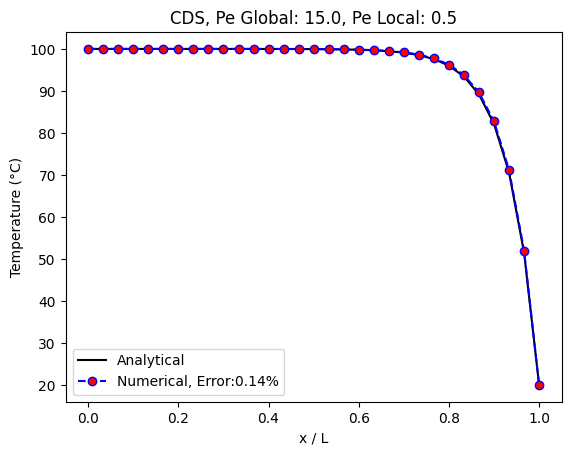

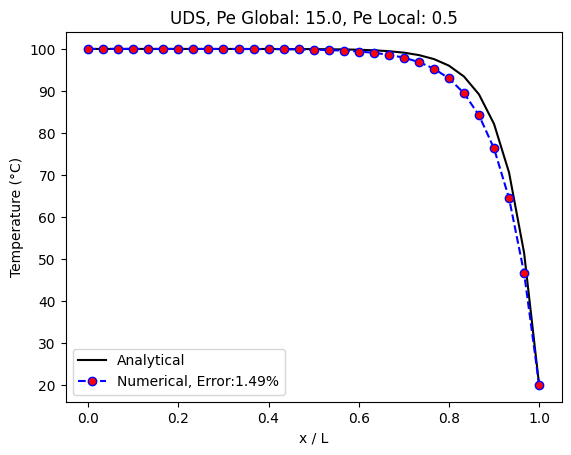

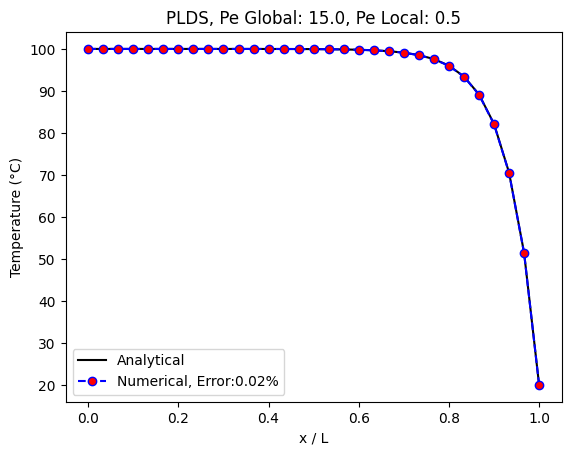

Solving for Cell Count = 11


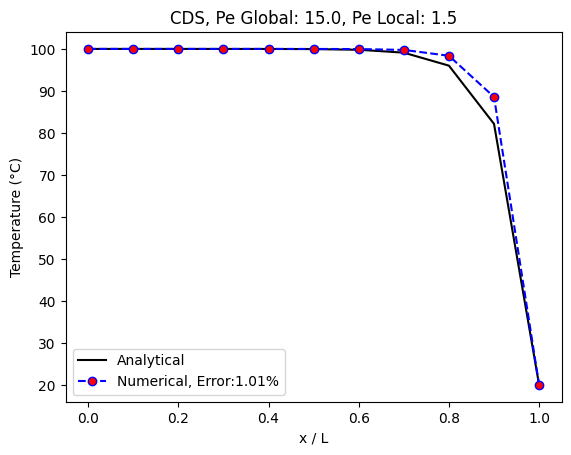

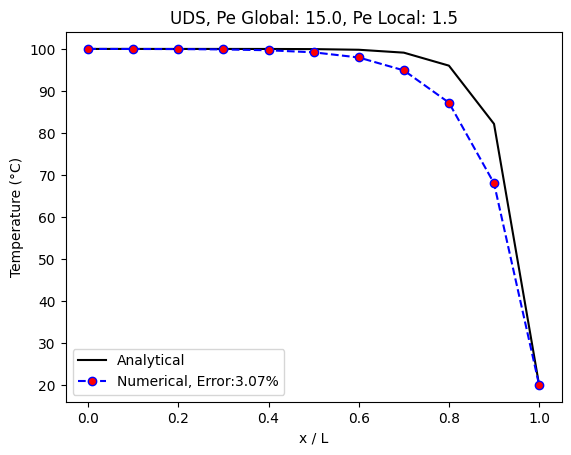

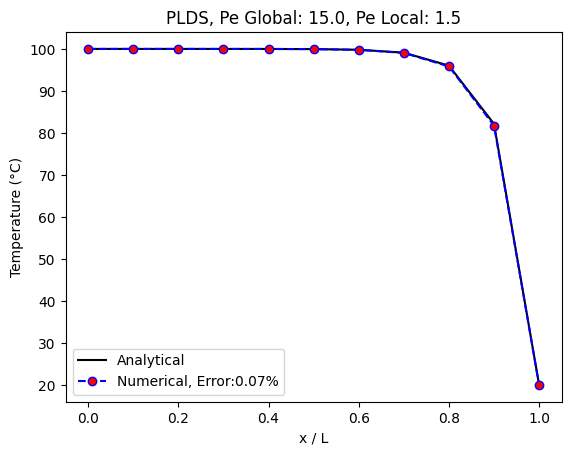

Solving for Cell Count = 7


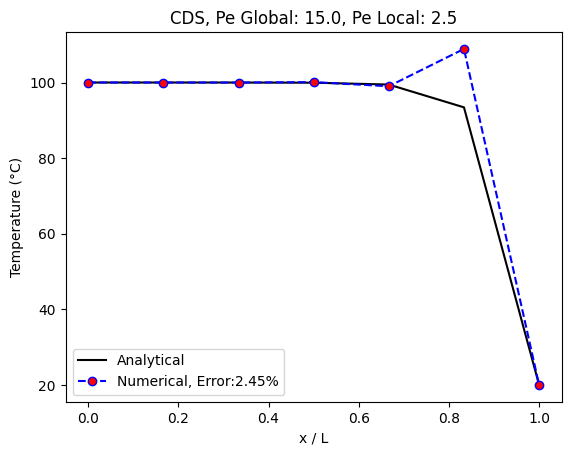

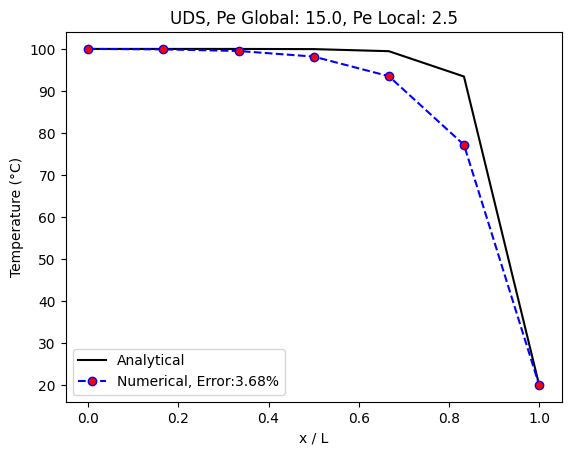

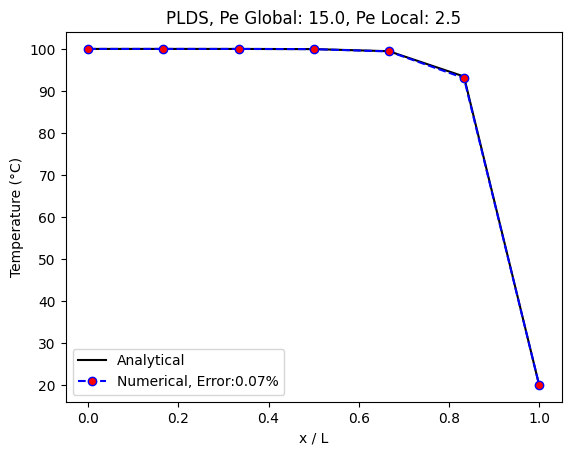

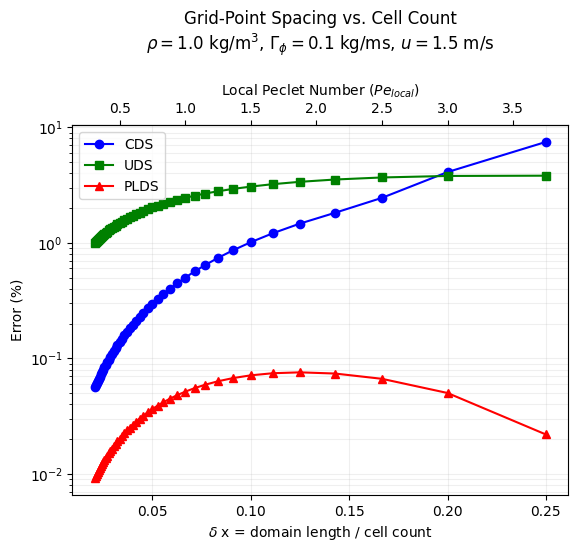

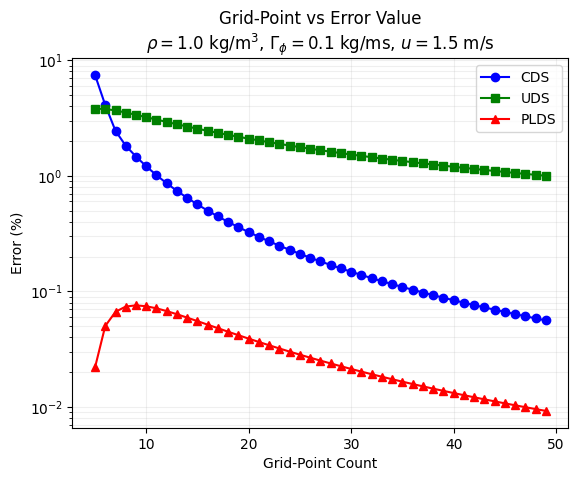

In [ ]:
import numpy as np
from algorithm_and_tools import analytical, plotting, error_calc, error_dx, error_cell
from schemes import cds, uds, pds

def solve(length, cell_count, gamma_T, density, vel, T_West, T_East):
    # Domain setup
    delta_x = length / (cell_count - 1)
    x = np.linspace(0, length, cell_count) 
    Temp = np.full(cell_count, T_East) # deg C

    Pe_local = (density * vel * delta_x / gamma_T)
    Pe_global = (density * vel * length / gamma_T)
    T_analytical = analytical(x, length, Pe_global, T_West, T_East)
    results = {
        "CDS" : cds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East), 
        "UDS" : uds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East), 
        "PLDS" : pds(cell_count, gamma_T, delta_x, density, vel, Temp, T_West, T_East, Pe_local)
        }
    
    errors = {name: error_calc(cell_count, T_analytical, res) for name, res in results.items()}
    return x, T_analytical, results, errors, Pe_local, Pe_global

L, rho, gamma_T, u = 1.0, 1.0, 0.1, 1.5

# Compare between schemes
cell_counts = [31, 11, 7]
for N in cell_counts:
    print(f"Solving for Cell Count = {N}")
    x, T_analytical, results, errors, Pe_L, Pe_G = solve(L, N, gamma_T, rho, u, 100.0, 20.0)
    for name in results:
        plotting(x, T_analytical, f"{name}", results[name], errors[name], Pe_G, Pe_L)

# Comparing Pe values in each scheme
cell_count, err_cds, err_uds, err_pds, dx, pe = [i for i in range(5,50,1)], [], [], [], [], []
for i in cell_count:
    x, T_analytical, results, errors, Pe_L, Pe_G = solve(L, i, gamma_T, rho, u, 100.0, 20.0)
    dx.append(L / (i-1))
    err_cds.append(errors["CDS"])
    err_uds.append(errors["UDS"])
    err_pds.append(errors["PLDS"])

error_dx(dx, err_cds, err_uds, err_pds, u, gamma_T, rho)
error_cell(cell_count, err_cds, err_uds, err_pds, u, gamma_T, rho)